In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
delivery = pd.read_csv('deliveries.csv')
orderitems = pd.read_csv('order_items.csv')
order = pd.read_csv('orders.csv')
product = pd.read_csv('products.csv')

In [3]:
delivery.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   order_id    1363008 non-null  int64 
 1   time_stamp  1363008 non-null  object
 2   status      1363008 non-null  object
dtypes: int64(1), object(2)
memory usage: 31.2+ MB


In [5]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  454336 non-null  int64 
 1   item_id   454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [6]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   order_id         454336 non-null  int64 
 1   order_placed_at  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   37 non-null     object
 1   category  37 non-null     object
 2   Item      37 non-null     object
 3   Size      37 non-null     object
 4   Price     37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [8]:
# Rename the column 'items_ordered' to 'item_id'
orderitems.rename(columns={'items_ordered': 'item_id'}, inplace=True)

# Display the first few rows and columns to confirm the change
orderitems.head(), orderitems.columns

(    order_id                      item_id
 0  321230114  ['p_025', 'p_032', 'p_037']
 1  321230115           ['p_017', 'p_012']
 2  321230116           ['p_027', 'p_037']
 3  321230117           ['p_004', 'p_029']
 4  321230118           ['p_017', 'p_037'],
 Index(['order_id', 'item_id'], dtype='object'))

In [9]:
delivery.describe()

,order_id
count,1.363008e+06
mean,3.214573e+08
std,1.311556e+05
min,3.212301e+08
25%,3.213437e+08
50%,3.214573e+08
75%,3.215709e+08
max,3.216844e+08


In [10]:
delivery.isnull().sum()

order_id      0
time_stamp    0
status        0
dtype: int64

In [11]:
orderitems.isnull().sum()

order_id    0
item_id     0
dtype: int64

In [12]:
order.isnull().sum()

order_id           0
order_placed_at    0
dtype: int64

In [13]:
product.isnull().sum()

item_id     0
category    0
Item        0
Size        0
Price       0
dtype: int64

In [14]:
delivery["time_stamp"] = pd.to_datetime(delivery["time_stamp"])

order["order_placed_at"] = pd.to_datetime(order["order_placed_at"])

In [15]:
merged_data = pd.merge(order, orderitems, on = "order_id", how = "inner")
dataset = pd.merge(merged_data, delivery, on = "order_id", how = "inner")

In [17]:
dataset.head()

,order_id,order_placed_at,item_id,time_stamp,status
0,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:41:02.000000000,Out For Delivery


### What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?
Round off the answer upto 2 decimal places.

In [18]:
# Calculate the delivery time in minutes
dataset["delivery_duration"] = (dataset["time_stamp"] - dataset["order_placed_at"]).dt.total_seconds()/ 60

# Calculate the average delivery time
average_delivery_time = dataset["delivery_duration"].mean()

# Print the result
print(f"The average delivery time is {average_delivery_time:.2f} minutes.")

The average delivery time is 8.55 minutes.


### What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [20]:
# Calculate the 99th percentile of the delivery time
percentile_99_delivery_time = dataset['delivery_duration'].quantile(0.99)

# Print the result
print(f"The 99th percentile delivery time is {percentile_99_delivery_time:.2f} minutes.")

The 99th percentile delivery time is 27.75 minutes.


### What is the order id with the maximum delivery time?

In [24]:
max_delivery_idx = dataset["delivery_duration"].idxmax()
order_id_max_delivery = dataset.loc[max_delivery_idx, "order_id"]
max_delivery_time = dataset.loc[max_delivery_idx, "delivery_duration"]

print(f"Order ID with the maximum delivery time: {order_id_max_delivery}")
print(f"Maximum delivery time: {max_delivery_time} minutes")

Order ID with the maximum delivery time: 321629049
Maximum delivery time: 62.91207812871667 minutes


### How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?

In [25]:
# Convert 'order_placed_at' to datetime if not done already
order['order_placed_at'] = pd.to_datetime(order['order_placed_at'])

# Filter orders between 1st and 31st January 2024
january_orders = order[(order['order_placed_at'] >= '2024-01-01') & (order['order_placed_at'] <= '2024-01-31')]

# Count the number of orders in this period
january_order_count = january_orders['order_id'].nunique()

print(f"Number of pizzas ordered between 1st and 31st January 2024: {january_order_count}")

Number of pizzas ordered between 1st and 31st January 2024: 11894


### How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)? This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund

In [27]:
# Convert 'order_placed_at' and 'time_stamp' to datetime (if not already done)
dataset['order_placed_at'] = pd.to_datetime(dataset['order_placed_at'])
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'])

# Filter orders between 1st and 31st January 2024
january_data = dataset[(dataset['order_placed_at'] >= '2024-01-01') & (dataset['order_placed_at'] <= '2024-01-31')]

# Filter orders that took more than 30 minutes to deliver
late_delivery = january_data[january_data['delivery_duration'] > 30]

# Count the number of late orders
late_order_count = late_delivery['order_id'].nunique()

print(f"Number of orders that took more than 30 minutes to deliver between 1st and 31st January 2024: {late_order_count}")

Number of orders that took more than 30 minutes to deliver between 1st and 31st January 2024: 158


In [29]:
import ast
dataset["item_id"] = dataset["item_id"].apply(ast.literal_eval)
dataset_exploded = dataset.explode("item_id")

In [30]:
dataset_exploded.head()

,order_id,order_placed_at,item_id,time_stamp,status,delivery_duration
0,321230114,2020-12-11 00:01:29,p_025,2020-12-11 00:01:29,Pending,0.0
0,321230114,2020-12-11 00:01:29,p_032,2020-12-11 00:01:29,Pending,0.0
0,321230114,2020-12-11 00:01:29,p_037,2020-12-11 00:01:29,Pending,0.0
1,321230114,2020-12-11 00:01:29,p_025,2020-12-11 00:06:29,Out For Delivery,5.0
1,321230114,2020-12-11 00:01:29,p_032,2020-12-11 00:06:29,Out For Delivery,5.0


In [31]:
dataset_exploded.shape

(3476679, 6)

In [33]:
dataset = dataset_exploded.merge(product, left_on = "item_id",right_on = "item_id", how = "left")
dataset.shape

(3476679, 10)

In [34]:
dataset.isnull().sum()


order_id             0
order_placed_at      0
item_id              0
time_stamp           0
status               0
delivery_duration    0
category             0
Item                 0
Size                 0
Price                0
dtype: int64

In [35]:
dataset.head()

,order_id,order_placed_at,item_id,time_stamp,status,delivery_duration,category,Item,Size,Price
0,321230114,2020-12-11 00:01:29,p_025,2020-12-11 00:01:29,Pending,0.0,Non Veg,Chicken Dominator,Regular,365
1,321230114,2020-12-11 00:01:29,p_032,2020-12-11 00:01:29,Pending,0.0,Non Veg,Indi Chicken Tikka,Medium,599
2,321230114,2020-12-11 00:01:29,p_037,2020-12-11 00:01:29,Pending,0.0,Veg,Coke,Regular,71
3,321230114,2020-12-11 00:01:29,p_025,2020-12-11 00:06:29,Out For Delivery,5.0,Non Veg,Chicken Dominator,Regular,365
4,321230114,2020-12-11 00:01:29,p_032,2020-12-11 00:06:29,Out For Delivery,5.0,Non Veg,Indi Chicken Tikka,Medium,599


### What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [37]:

orders_2023 = dataset[dataset['order_placed_at'].dt.year == 2023]


# Find orders where delivery time exceeds 30 minutes
late_delivery = orders_2023[orders_2023['delivery_duration'] > 30]

# Calculate the total amount refunded due to late deliveries
total_refund = late_delivery['Price'].sum()

print(f"Total amount lost due to refunds in 2023: {total_refund:.2f}")


Total amount lost due to refunds in 2023: 1826393.00


### In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [39]:
# Extract the year from 'order_placed_at'
late_delivery['year'] = late_delivery['order_placed_at'].dt.year

# Group by year and sum the refund amounts (assuming the refund is the 'cost' or 'Price' column)
yearly_refunds = late_delivery.groupby('year')['Price'].sum()  # Change 'cost' to the correct price column if needed

# Find the year with the maximum refund amount
max_refund_year = yearly_refunds.idxmax()
max_refund_amount = yearly_refunds.max()

print(f"The pizza store lost the maximum amount in {max_refund_year}, with a total refund of {max_refund_amount:.2f}.")

The pizza store lost the maximum amount in 2023, with a total refund of 1826393.00.


### How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [43]:
# Filter for orders that took 30 minutes or less
on_time_orders = dataset[dataset['delivery_duration'] <= 30]

# Filter out the data that were delivered
orders_delivered_on_time = on_time_orders[on_time_orders["status"] == "Delivered"]

# Calculate total revenue (excluding refunds)
total_revenue = on_time_orders['Price'].sum()

print("Total revenue generated (excluding refunds):", total_revenue)

Total revenue generated (excluding refunds): 1217979030


### (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.) 

In [45]:
# Extract the year, date, and hour from the order_placed_at timestamp
dataset["Year"] = dataset["order_placed_at"].dt.year
dataset["Date"] = dataset["order_placed_at"].dt.date
dataset["Hour"] = dataset["order_placed_at"].dt.hour

# Sort the dataset by order_placed_at for accurate ordering
sorted_dataset = dataset.sort_values(by="order_placed_at")

# Remove duplicate orders, keeping only the first instance of each order_id
unique_orders_dataset = sorted_dataset.drop_duplicates(subset="order_id",keep="first")

# Group the data by Year, Date, and Hour to count the number of unique orders␣per hour
orders_per_hour = unique_orders_dataset.groupby(["Year", "Date", "Hour"]).size().reset_index(name="Number_of_orders")

# Calculate the average number of orders per day from the grouped data
average_orders_per_hour = orders_per_hour["Number_of_orders"].mean()

# Print the average number of orders per day, rounded to the nearest wholenumber
print(f"The average number of orders per hour is:{round(average_orders_per_hour)}")

The average number of orders per hour is:17


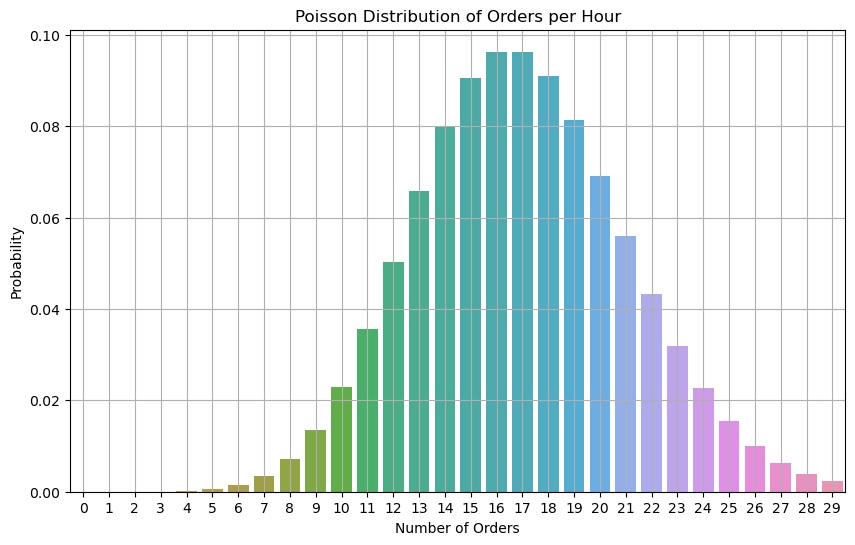

Probability of receiving exactly 5 orders in an hour: 0.0005
Cumulative probability of receiving up to 5 orders in an hour: 0.0007


In [50]:
from scipy.stats import poisson
# Parameters
lambda_rate = 17  # Average number of orders per hour

# Generate Poisson distribution data
x = np.arange(0, 30)  # Possible number of orders
pmf = poisson.pmf(x, lambda_rate)  # Probability mass function

# Plotting the Poisson distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=pmf)
plt.title('Poisson Distribution of Orders per Hour')
plt.xlabel('Number of Orders')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid()
plt.show()

# Example calculation: Probability of receiving exactly 5 orders in an hour
prob_5_orders = poisson.pmf(5, lambda_rate)
print(f"Probability of receiving exactly 5 orders in an hour: {prob_5_orders:.4f}")

# Example calculation: Cumulative probability of receiving up to 5 orders
cumulative_prob_5 = poisson.cdf(5, lambda_rate)
print(f"Cumulative probability of receiving up to 5 orders in an hour: {cumulative_prob_5:.4f}")

### Poisson distribution is suitable for modeling the number of events (in this case, orders) that occur in a fixed interval of time or space when these events happen with a known constant mean rate and independently of the time since the last event.